In [72]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [74]:
#Load CSV file
df = pd.read_csv('./medical_clean.csv', index_col=0)

In [76]:
#Inspecting dataframe
df.head(5)

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [78]:
#Convert column to string from int, then front-fill string with 0's to reach 5 chars
df['Zip'] = df['Zip'].astype("str").str.zfill(5)
#Convert column to category from string
df["Area"] = df["Area"].astype("category")
#Convert column to category from string
df["TimeZone"] = df["TimeZone"].astype("category")
#Reformat column representing currency in USD to 3 decimal places from 6
df["Income"] = df["Income"].astype(int)
#Convert column to category from string
df["Marital"] = df["Marital"].astype("category")
#Convert column to category from string
df["Gender"] = df["Gender"].astype("category")
#Recast object > boolean wants to turn everything True, need to map Yes/No to True/False
bool_mapping = {"Yes" : 1, "No" : 0}
#Convert column to boolean from string
df["ReAdmis"] = df["ReAdmis"].map(bool_mapping)
#Convert column to boolean from string
df["Soft_drink"] = df["Soft_drink"].map(bool_mapping)
#Convert column to category from string
df["Initial_admin"] = df["Initial_admin"].astype("category")
#Convert column to boolean from string
df["HighBlood"] = df["HighBlood"].map(bool_mapping)
#Convert column to boolean from string
df["Stroke"] = df["Stroke"].map(bool_mapping)
#Convert column to category from string
df["Complication_risk"] = df["Complication_risk"].astype("category")
#Convert column to boolean from string
df["Overweight"] = df["Overweight"].map(bool_mapping)
#Convert column to boolean from string
df["Arthritis"] = df["Arthritis"].map(bool_mapping)
#Convert column to boolean from string
df["Diabetes"] = df["Diabetes"].map(bool_mapping)
#Convert column to boolean from string
df["Hyperlipidemia"] = df["Hyperlipidemia"].map(bool_mapping)
#Convert column to boolean from string
df["BackPain"] = df["BackPain"].map(bool_mapping)
#Convert column to boolean from string
df["Anxiety"] = df["Anxiety"].map(bool_mapping)
#Convert column to boolean from string
df["Allergic_rhinitis"] = df["Allergic_rhinitis"].map(bool_mapping)
#Convert column to boolean from string
df["Reflux_esophagitis"] = df["Reflux_esophagitis"].map(bool_mapping)
#Convert column to boolean from string
df["Asthma"] = df["Asthma"].map(bool_mapping)
#Convert column to category from string
df["Services"] = df["Services"].astype("category")
#Reformat column representing currency in USD to 3 decimal places from 6
df["TotalCharge"] = df.TotalCharge.round(3)
#Reformat column representing currency in USD to 3 decimal places from 6
df["Additional_charges"] = df.Additional_charges.round(3)
#Establish map for reversing survey questions to reflect a truth where 1 < 8 (currently the reverse)
survey_mapping = {1: 8, 2: 7, 3 : 6, 4: 5, 5: 4, 6: 3, 7 : 2, 8 : 1}
#Remap column to reflect 1 < 8, rather than 1 > 8
df["Item1"] = df["Item1"].map(survey_mapping)
#Remap from int to float
df["Item1"] = df["Item1"].astype('float64')
#Remap column to reflect 1 < 8, rather than 1 > 8
df["Item2"] = df["Item2"].map(survey_mapping)
#Remap from int to float
df["Item2"] = df["Item2"].astype('float64')
#Remap column to reflect 1 < 8, rather than 1 > 8
df["Item3"] = df["Item3"].map(survey_mapping)
#Remap from int to float
df["Item3"] = df["Item3"].astype('float64')
#Remap column to reflect 1 < 8, rather than 1 > 8
df["Item4"] = df["Item4"].map(survey_mapping)
#Remap from int to float
df["Item4"] = df["Item4"].astype('float64')
#Remap column to reflect 1 < 8, rather than 1 > 8
df["Item5"] = df["Item5"].map(survey_mapping)
#Remap from int to float
df["Item5"] = df["Item5"].astype('float64')
#Remap column to reflect 1 < 8, rather than 1 > 8
df["Item6"] = df["Item6"].map(survey_mapping)
#Remap from int to float
df["Item6"] = df["Item6"].astype('float64')
#Remap column to reflect 1 < 8, rather than 1 > 8
df["Item7"] = df["Item7"].map(survey_mapping)
#Remap from int to float
df["Item7"] = df["Item7"].astype('float64')
#Remap column to reflect 1 < 8, rather than 1 > 8
df["Item8"] = df["Item8"].map(survey_mapping)
#Remap from int to float
df["Item8"] = df["Item8"].astype('float64')

#Visually inspect Dataframe
df.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,...,3726.703,17939.403,6.0,6.0,7.0,7.0,5.0,6.0,6.0,5.0
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,...,4193.190,17612.998,6.0,5.0,6.0,5.0,5.0,5.0,6.0,6.0
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,...,2434.234,17505.192,7.0,5.0,5.0,5.0,6.0,5.0,6.0,6.0
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,...,2127.830,12993.437,6.0,4.0,4.0,6.0,5.0,4.0,4.0,4.0
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,...,2113.073,3716.526,7.0,8.0,6.0,6.0,4.0,6.0,5.0,6.0


In [80]:
#Placing variables for analysis into a different table. 
hca_df = df[["Children", "Age", "ReAdmis", "Doc_visits", "vitD_supp", "Soft_drink", "HighBlood", "Stroke", 
        "Overweight", "Arthritis", "Diabetes", "Hyperlipidemia", "BackPain", "Anxiety", "Allergic_rhinitis", 
        "Reflux_esophagitis", "Asthma"]].copy()
hca_df.head()

,Children,Age,ReAdmis,Doc_visits,vitD_supp,Soft_drink,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma
CaseOrder,,,,,,,,,,,,,,,,,
1,1,53,0,6,0,0,1,0,0,1,1,0,1,1,1,0,1
2,3,51,0,4,1,0,1,0,1,0,0,0,0,0,0,1,0
3,3,53,0,4,0,0,1,0,1,0,1,0,0,0,0,0,0
4,0,78,0,4,0,0,0,1,0,1,0,0,0,0,0,1,1
5,1,22,0,5,2,1,0,0,0,0,0,1,0,0,1,0,0


In [82]:
#Standardizing Variables
scaler = StandardScaler()
X_standardized = scaler.fit_transform(hca_df)

In [84]:
#General Stats on the Variables I am interested in
print(f"For Number of Children, the mean overall score is {round(hca_df.Children.mean(), 3)}, with a standard deviation of {round(hca_df.Children.std(), 3)}.")
print(f"For Age, the mean overall score is {round(hca_df.Age.mean(), 3)}, with a standard deviation of {round(hca_df.Age.std(), 3)}.")
print(f"For Readmission, the mean overall score is {round(hca_df.ReAdmis.mean(), 3)}, with a standard deviation of {round(hca_df.ReAdmis.std(), 3)}.")
print(f"For Doc_visits, the mean overall score is {round(hca_df.Doc_visits.mean(), 3)}, with a standard deviation of {round(hca_df.Doc_visits.std(), 3)}.")
print(f"For vitD_supp, the mean overall score is {round(hca_df.vitD_supp.mean(), 3)}, with a standard deviation of {round(hca_df.vitD_supp.std(), 3)}.")
print(f"For Soft_drink, the mean overall score is {round(hca_df.Soft_drink.mean(), 3)}, with a standard deviation of {round(hca_df.Soft_drink.std(), 3)}.")
print(f"For HighBlood, the mean overall score is {round(hca_df.HighBlood.mean(), 3)}, with a standard deviation of {round(hca_df.HighBlood.std(), 3)}.")
print(f"For Stroke, the mean overall score is {round(hca_df.Stroke.mean(), 3)}, with a standard deviation of {round(hca_df.Stroke.std(), 3)}.")
print(f"For Overweight, the mean overall score is {round(hca_df.Overweight.mean(), 3)}, with a standard deviation of {round(hca_df.Overweight.std(), 3)}.")
print(f"For Arthritis, the mean overall score is {round(hca_df.Arthritis.mean(), 3)}, with a standard deviation of {round(hca_df.Arthritis.std(), 3)}.")
print(f"For Diabetes, the mean overall score is {round(hca_df.Diabetes.mean(), 3)}, with a standard deviation of {round(hca_df.Diabetes.std(), 3)}.")
print(f"For Hyperlipidemia, the mean overall score is {round(hca_df.Hyperlipidemia.mean(), 3)}, with a standard deviation of {round(hca_df.Hyperlipidemia.std(), 3)}.")
print(f"For BackPain, the mean overall score is {round(hca_df.BackPain.mean(), 3)}, with a standard deviation of {round(hca_df.BackPain.std(), 3)}.")
print(f"For Anxiety, the mean overall score is {round(hca_df.Anxiety.mean(), 3)}, with a standard deviation of {round(hca_df.Anxiety.std(), 3)}.")
print(f"For Allergic_rhinitis, the mean overall score is {round(hca_df.Allergic_rhinitis.mean(), 3)}, with a standard deviation of {round(hca_df.Allergic_rhinitis.std(), 3)}.")
print(f"For Reflux_esophagitis, the mean overall score is {round(hca_df.Reflux_esophagitis.mean(), 3)}, with a standard deviation of {round(hca_df.Reflux_esophagitis.std(), 3)}.")
print(f"For Asthma, the mean overall score is {round(hca_df.Asthma.mean(), 3)}, with a standard deviation of {round(hca_df.Asthma.std(), 3)}.")

For Number of Children, the mean overall score is 2.097, with a standard deviation of 2.164.
For Age, the mean overall score is 53.512, with a standard deviation of 20.639.
For Readmission, the mean overall score is 0.367, with a standard deviation of 0.482.
For Doc_visits, the mean overall score is 5.012, with a standard deviation of 1.046.
For vitD_supp, the mean overall score is 0.399, with a standard deviation of 0.629.
For Soft_drink, the mean overall score is 0.258, with a standard deviation of 0.437.
For HighBlood, the mean overall score is 0.409, with a standard deviation of 0.492.
For Stroke, the mean overall score is 0.199, with a standard deviation of 0.399.
For Overweight, the mean overall score is 0.709, with a standard deviation of 0.454.
For Arthritis, the mean overall score is 0.357, with a standard deviation of 0.479.
For Diabetes, the mean overall score is 0.274, with a standard deviation of 0.446.
For Hyperlipidemia, the mean overall score is 0.337, with a standard d

In [86]:
#Save dataframe to CSV
hca_df.to_csv('Task1_cleanMedical_JHOSEY.csv', index=False)

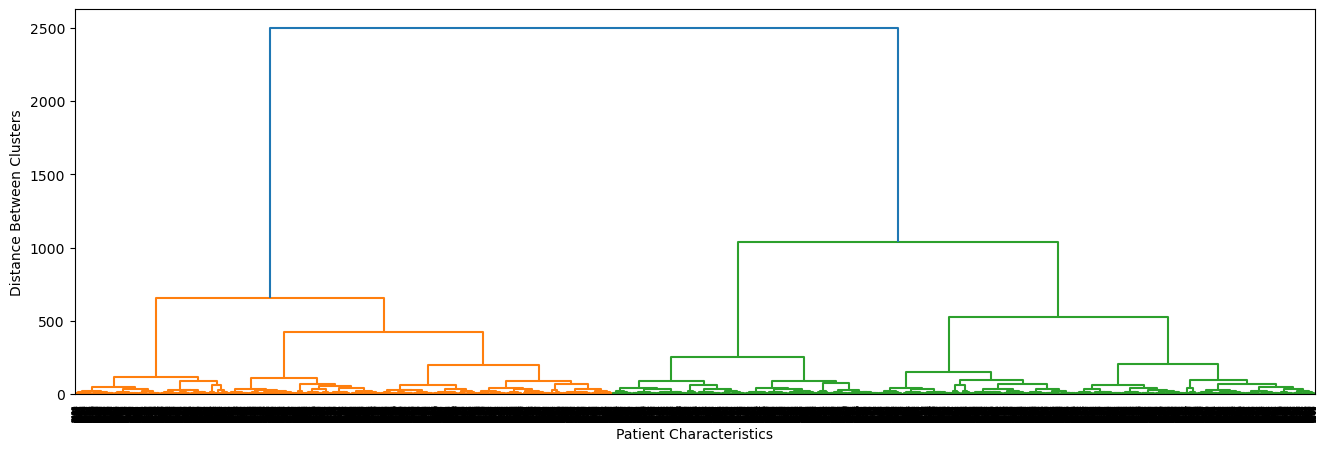

ward_cluster_labels
1    4335
2    5665
Name: count, dtype: int64


In [88]:
#Using the linkage() function for hierarchical clustering. Use the Ward Method. 
distance_matrix_ward = linkage(hca_df[["Children", "Age", "ReAdmis", "Doc_visits", "vitD_supp", "Soft_drink", "HighBlood", "Stroke", 
                                   "Overweight", "Arthritis", "Diabetes", "Hyperlipidemia", "BackPain", "Anxiety", "Allergic_rhinitis", 
                                   "Reflux_esophagitis", "Asthma"]], method = 'ward', metric = 'euclidean')
#Generate Dendrogram
plt.figure(figsize = [16,5])
dendrogram_ward = dendrogram(distance_matrix_ward)
plt.xlabel("Patient Characteristics")
plt.ylabel("Distance Between Clusters");
plt.show()

#Assign cluster labels
hca_df['ward_cluster_labels'] = fcluster(distance_matrix_ward, 2, criterion='maxclust')
print(hca_df['ward_cluster_labels'].value_counts().sort_index())

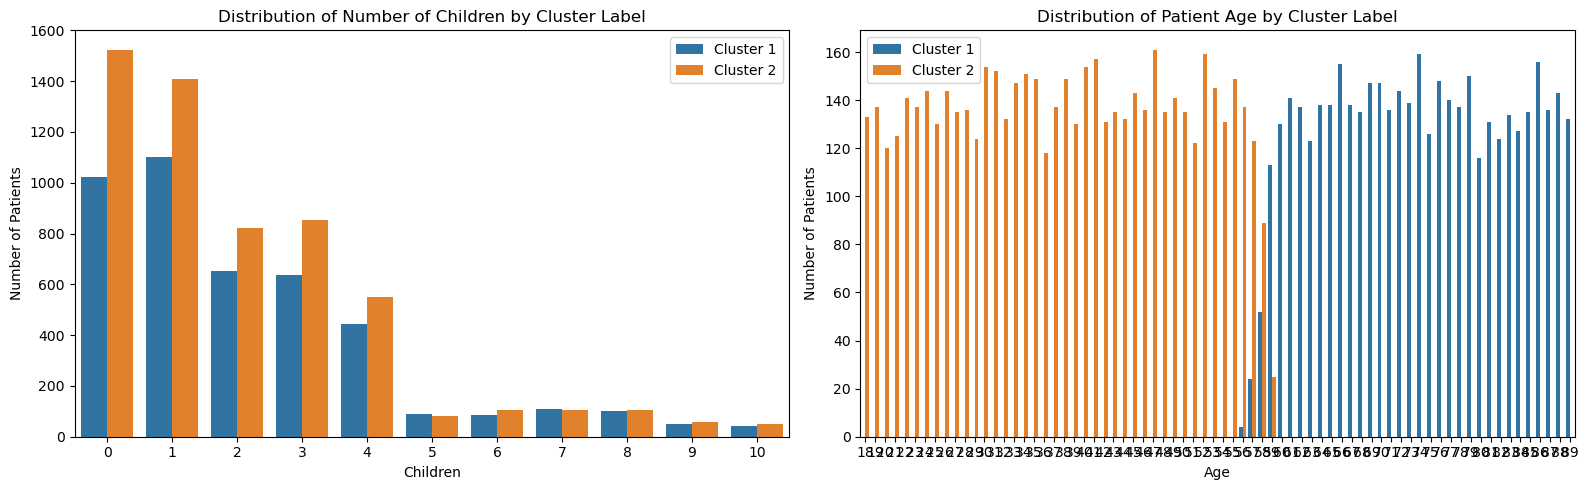


For Number of Children, respondents from Cluster 1 had 2.192, on average.
Respondents from Cluster 2 had 2.024, on average.

For Patient Age, respondents from Cluster 1 were 73.74 years old, on average.
Respondents from Cluster 2 were 38.032 years old, on average.


In [90]:
plt.figure(figsize = [16,5])

#LEFT plot: Distribution of Children, by cluster label
plt.subplot(1, 2, 1)
plt.title('Distribution of Number of Children by Cluster Label')
sns.countplot(data = hca_df, x="Children", hue="ward_cluster_labels")
plt.legend(["Cluster 1", "Cluster 2"])
plt.xlabel("Children")
plt.ylabel("Number of Patients");

#RIGHT plot: Distribution of Age, by cluster label
plt.subplot(1, 2, 2)
plt.title("Distribution of Patient Age by Cluster Label")
sns.countplot(data = hca_df, x="Age", hue="ward_cluster_labels")
plt.legend(["Cluster 1", "Cluster 2"])
plt.xlabel("Age")
plt.ylabel("Number of Patients");

#Display the plot
plt.tight_layout()
plt.show();

child_c1_mean = hca_df.loc[hca_df['ward_cluster_labels'] == 1, 'Children'].mean()
child_c2_mean = hca_df.loc[hca_df['ward_cluster_labels'] == 2, 'Children'].mean()
print(f"\nFor Number of Children, respondents from Cluster 1 had {round(child_c1_mean, 3)}, on average.")
print(f"Respondents from Cluster 2 had {round(child_c2_mean, 3)}, on average.")
age_c1_mean = hca_df.loc[hca_df['ward_cluster_labels'] == 1, 'Age'].mean()
age_c2_mean = hca_df.loc[hca_df['ward_cluster_labels'] == 2, 'Age'].mean()
print(f"\nFor Patient Age, respondents from Cluster 1 were {round(age_c1_mean, 3)} years old, on average.")
print(f"Respondents from Cluster 2 were {round(age_c2_mean, 3)} years old, on average.")

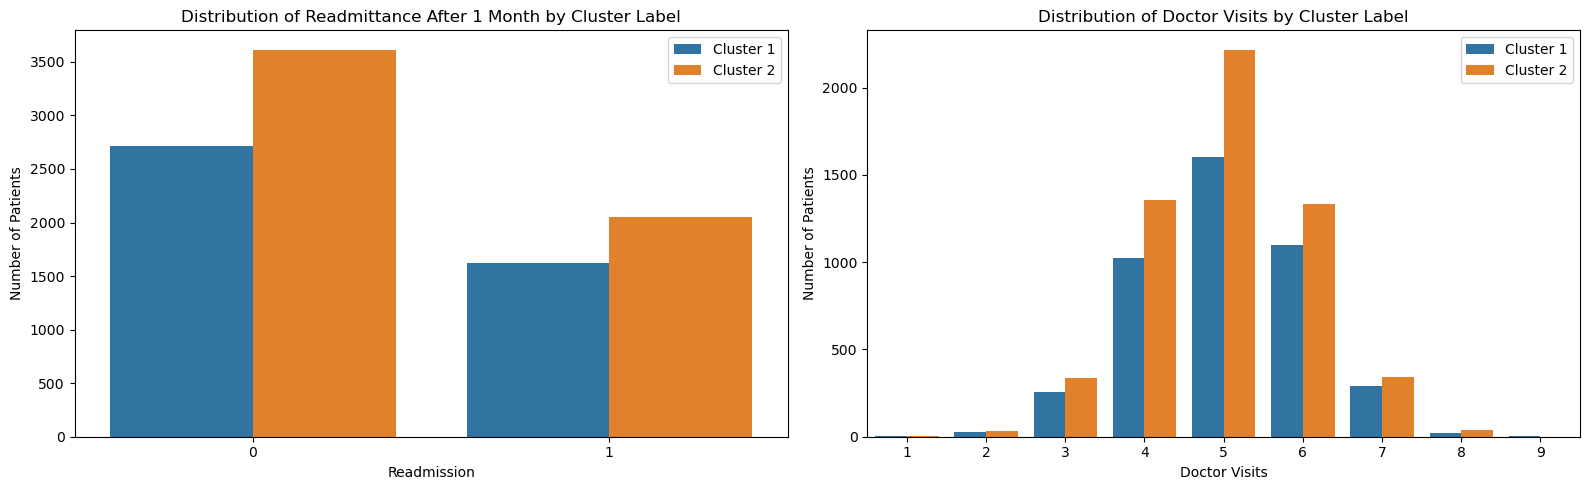


For Readmission, respondents from Cluster 1 were readmitted 0.373 times, on average.
Respondents from Cluster 2 were readmitted 0.362 times, on average.

For Doctor Visits, respondents from Cluster 1 had 5.032 visits, on average.
Respondents from Cluster 2 had 4.997 visits, on average.


In [92]:
plt.figure(figsize = [16,5])

#LEFT plot: Distribution of Readmission, by cluster label
plt.subplot(1, 2, 1)
plt.title('Distribution of Readmittance After 1 Month by Cluster Label')
sns.countplot(data = hca_df, x="ReAdmis", hue="ward_cluster_labels")
plt.legend(["Cluster 1", "Cluster 2"])
plt.xlabel("Readmission")
plt.ylabel("Number of Patients");

#RIGHT plot: Distribution of Doctor Visits, by cluster label
plt.subplot(1, 2, 2)
plt.title("Distribution of Doctor Visits by Cluster Label")
sns.countplot(data = hca_df, x="Doc_visits", hue="ward_cluster_labels")
plt.legend(["Cluster 1", "Cluster 2"])
plt.xlabel("Doctor Visits")
plt.ylabel("Number of Patients");

#Display the plot
plt.tight_layout()
plt.show();

ReAdmis_c1_mean = hca_df.loc[hca_df['ward_cluster_labels'] == 1, 'ReAdmis'].mean()
ReAdmis_c2_mean = hca_df.loc[hca_df['ward_cluster_labels'] == 2, 'ReAdmis'].mean()
print(f"\nFor Readmission, respondents from Cluster 1 were readmitted {round(ReAdmis_c1_mean, 3)} times, on average.")
print(f"Respondents from Cluster 2 were readmitted {round(ReAdmis_c2_mean, 3)} times, on average.")
docv_c1_mean = hca_df.loc[hca_df['ward_cluster_labels'] == 1, 'Doc_visits'].mean()
docv_c2_mean = hca_df.loc[hca_df['ward_cluster_labels'] == 2, 'Doc_visits'].mean()
print(f"\nFor Doctor Visits, respondents from Cluster 1 had {round(docv_c1_mean, 3)} visits, on average.")
print(f"Respondents from Cluster 2 had {round(docv_c2_mean, 3)} visits, on average.")

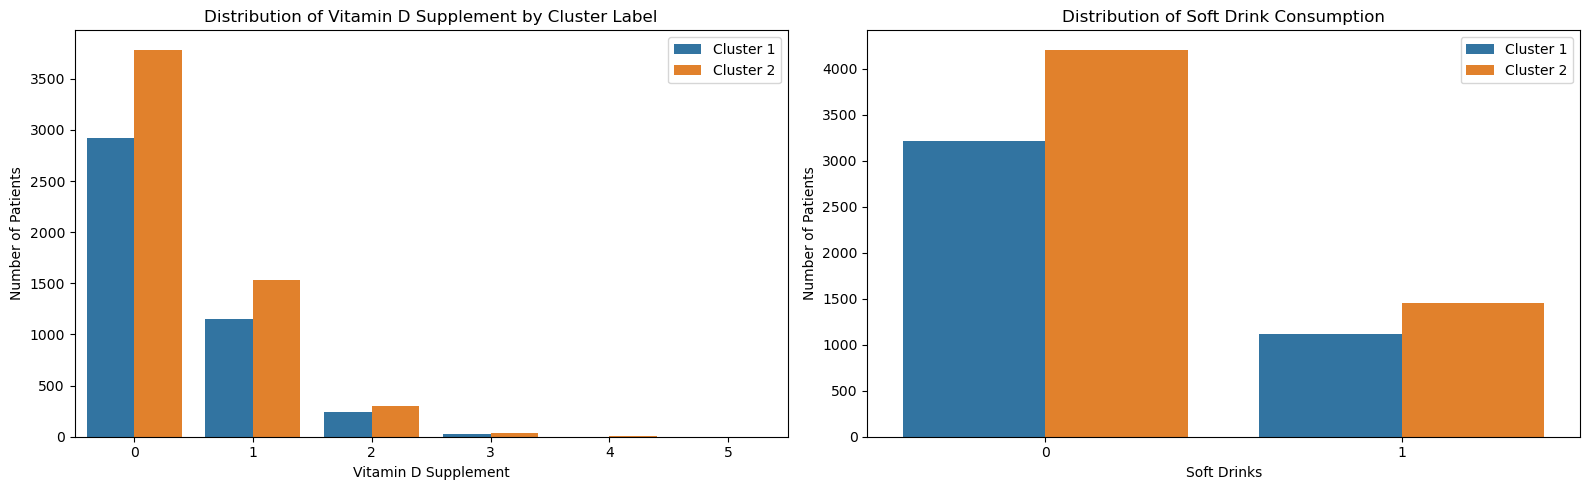


For Vitamin D Supplement, respondents from Cluster 1 supplemented 0.396, on average.
Respondents from Cluster 2 supplemented 0.401, on average.

For Soft Drink Consumption, respondents from Cluster 1 had 0.258 drinks, on average.
Respondents from Cluster 2 had 0.257 drinks, on average.


In [94]:
plt.figure(figsize = [16,5])

#LEFT plot: Distribution of Vitamin D supplement Consumption, by cluster label
plt.subplot(1, 2, 1)
plt.title('Distribution of Vitamin D Supplement by Cluster Label')
sns.countplot(data = hca_df, x="vitD_supp", hue="ward_cluster_labels")
plt.legend(["Cluster 1", "Cluster 2"])
plt.xlabel("Vitamin D Supplement")
plt.ylabel("Number of Patients");

#RIGHT plot: Distribution of Soft Drink Consumption, by cluster label
plt.subplot(1, 2, 2)
plt.title("Distribution of Soft Drink Consumption")
sns.countplot(data = hca_df, x="Soft_drink", hue="ward_cluster_labels")
plt.legend(["Cluster 1", "Cluster 2"])
plt.xlabel("Soft Drinks")
plt.ylabel("Number of Patients");

#Display the plot
plt.tight_layout()
plt.show();

vitdsupp_c1_mean = hca_df.loc[hca_df['ward_cluster_labels'] == 1, 'vitD_supp'].mean()
vitdsupp_c2_mean = hca_df.loc[hca_df['ward_cluster_labels'] == 2, 'vitD_supp'].mean()
print(f"\nFor Vitamin D Supplement, respondents from Cluster 1 supplemented {round(vitdsupp_c1_mean, 3)}, on average.")
print(f"Respondents from Cluster 2 supplemented {round(vitdsupp_c2_mean, 3)}, on average.")
sdr_c1_mean = hca_df.loc[hca_df['ward_cluster_labels'] == 1, 'Soft_drink'].mean()
sdr_c2_mean = hca_df.loc[hca_df['ward_cluster_labels'] == 2, 'Soft_drink'].mean()
print(f"\nFor Soft Drink Consumption, respondents from Cluster 1 had {round(sdr_c1_mean, 3)} drinks, on average.")
print(f"Respondents from Cluster 2 had {round(sdr_c2_mean, 3)} drinks, on average.")

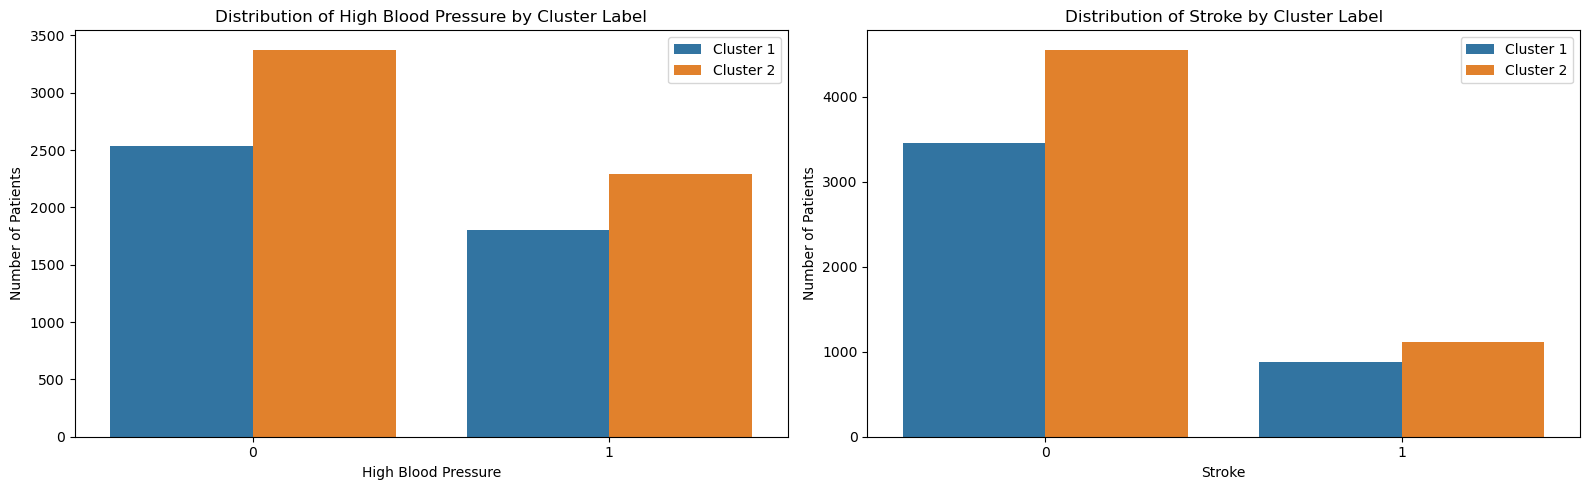


For High Blood Pressure, respondents from Cluster 1 had 0.415, on average.
Respondents from Cluster 2 had 0.404, on average.

For Stroke, respondents from Cluster 1 had 0.203, on average.
Respondents from Cluster 2 had 0.196, on average.


In [96]:
plt.figure(figsize = [16,5])

#LEFT plot: Distribution of High Blood Pressure, by cluster label
plt.subplot(1, 2, 1)
plt.title('Distribution of High Blood Pressure by Cluster Label')
sns.countplot(data = hca_df, x="HighBlood", hue="ward_cluster_labels")
plt.legend(["Cluster 1", "Cluster 2"])
plt.xlabel("High Blood Pressure")
plt.ylabel("Number of Patients");

#RIGHT plot: Distribution of Stroke, by cluster label
plt.subplot(1, 2, 2)
plt.title("Distribution of Stroke by Cluster Label")
sns.countplot(data = hca_df, x="Stroke", hue="ward_cluster_labels")
plt.legend(["Cluster 1", "Cluster 2"])
plt.xlabel("Stroke")
plt.ylabel("Number of Patients");

#Display the plot
plt.tight_layout()
plt.show();

HB_c1_mean = hca_df.loc[hca_df['ward_cluster_labels'] == 1, 'HighBlood'].mean()
HB_c2_mean = hca_df.loc[hca_df['ward_cluster_labels'] == 2, 'HighBlood'].mean()
print(f"\nFor High Blood Pressure, respondents from Cluster 1 had {round(HB_c1_mean, 3)}, on average.")
print(f"Respondents from Cluster 2 had {round(HB_c2_mean, 3)}, on average.")
Str_c1_mean = hca_df.loc[hca_df['ward_cluster_labels'] == 1, 'Stroke'].mean()
Str_c2_mean = hca_df.loc[hca_df['ward_cluster_labels'] == 2, 'Stroke'].mean()
print(f"\nFor Stroke, respondents from Cluster 1 had {round(Str_c1_mean, 3)}, on average.")
print(f"Respondents from Cluster 2 had {round(Str_c2_mean, 3)}, on average.")

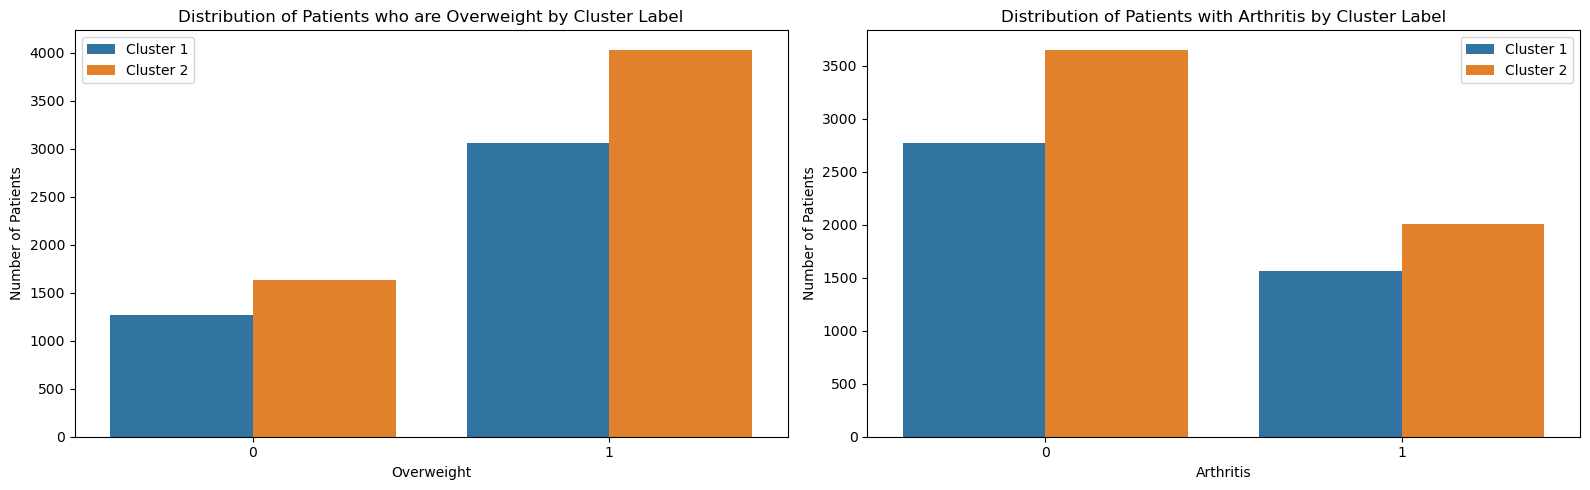


For Overweight, respondents from Cluster 1 were 0.707, on average.
Respondents from Cluster 2 were 0.712, on average.

For Arthritis, respondents from Cluster 1 had 0.361, on average.
Respondents from Cluster 2 had 0.355, on average.


In [98]:
plt.figure(figsize = [16,5])

#LEFT plot: Distribution of Overweight, by cluster label
plt.subplot(1, 2, 1)
plt.title('Distribution of Patients who are Overweight by Cluster Label')
sns.countplot(data = hca_df, x="Overweight", hue="ward_cluster_labels")
plt.legend(["Cluster 1", "Cluster 2"])
plt.xlabel("Overweight")
plt.ylabel("Number of Patients");

#RIGHT plot: Distribution of Arthritis, by cluster label
plt.subplot(1, 2, 2)
plt.title("Distribution of Patients with Arthritis by Cluster Label")
sns.countplot(data = hca_df, x="Arthritis", hue="ward_cluster_labels")
plt.legend(["Cluster 1", "Cluster 2"])
plt.xlabel("Arthritis")
plt.ylabel("Number of Patients");

#Display the plot
plt.tight_layout()
plt.show();

ow_c1_mean = hca_df.loc[hca_df['ward_cluster_labels'] == 1, 'Overweight'].mean()
ow_c2_mean = hca_df.loc[hca_df['ward_cluster_labels'] == 2, 'Overweight'].mean()
print(f"\nFor Overweight, respondents from Cluster 1 were {round(ow_c1_mean, 3)}, on average.")
print(f"Respondents from Cluster 2 were {round(ow_c2_mean, 3)}, on average.")
Arth_c1_mean = hca_df.loc[hca_df['ward_cluster_labels'] == 1, 'Arthritis'].mean()
Arth_c2_mean = hca_df.loc[hca_df['ward_cluster_labels'] == 2, 'Arthritis'].mean()
print(f"\nFor Arthritis, respondents from Cluster 1 had {round(Arth_c1_mean, 3)}, on average.")
print(f"Respondents from Cluster 2 had {round(Arth_c2_mean, 3)}, on average.")

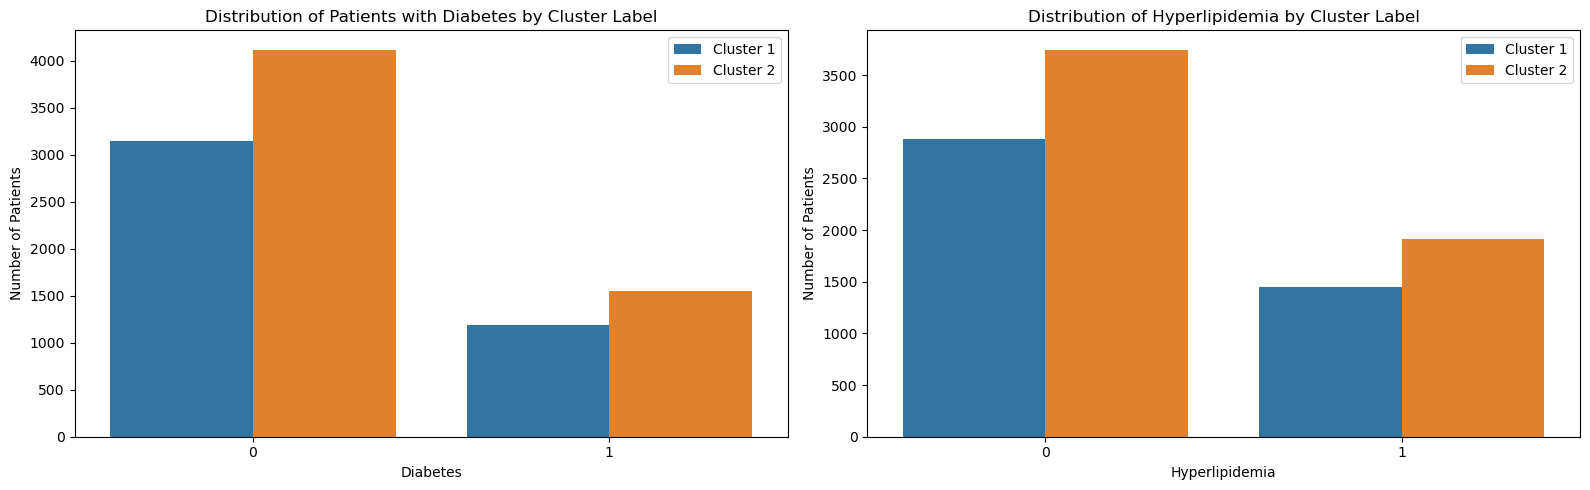


For Diabetes, respondents from Cluster 1 had 0.275, on average.
Respondents from Cluster 2 had 0.273, on average.

For Hyperlipidemia, respondents from Cluster 1 had 0.335, on average.
Respondents from Cluster 2 had 0.339, on average.


In [100]:
plt.figure(figsize = [16,5])

#LEFT plot: Distribution of Diabetes, by cluster label
plt.subplot(1, 2, 1)
plt.title('Distribution of Patients with Diabetes by Cluster Label')
sns.countplot(data = hca_df, x="Diabetes", hue="ward_cluster_labels")
plt.legend(["Cluster 1", "Cluster 2"])
plt.xlabel("Diabetes")
plt.ylabel("Number of Patients");

#RIGHT plot: Distribution of Hyperlipidemia, by cluster label
plt.subplot(1, 2, 2)
plt.title("Distribution of Hyperlipidemia by Cluster Label")
sns.countplot(data = hca_df, x="Hyperlipidemia", hue="ward_cluster_labels")
plt.legend(["Cluster 1", "Cluster 2"])
plt.xlabel("Hyperlipidemia")
plt.ylabel("Number of Patients");

#Display the plot
plt.tight_layout()
plt.show();

Diab_c1_mean = hca_df.loc[hca_df['ward_cluster_labels'] == 1, 'Diabetes'].mean()
Diab_c2_mean = hca_df.loc[hca_df['ward_cluster_labels'] == 2, 'Diabetes'].mean()
print(f"\nFor Diabetes, respondents from Cluster 1 had {round(Diab_c1_mean, 3)}, on average.")
print(f"Respondents from Cluster 2 had {round(Diab_c2_mean, 3)}, on average.")
HyLp_c1_mean = hca_df.loc[hca_df['ward_cluster_labels'] == 1, 'Hyperlipidemia'].mean()
HyLp_c2_mean = hca_df.loc[hca_df['ward_cluster_labels'] == 2, 'Hyperlipidemia'].mean()
print(f"\nFor Hyperlipidemia, respondents from Cluster 1 had {round(HyLp_c1_mean, 3)}, on average.")
print(f"Respondents from Cluster 2 had {round(HyLp_c2_mean, 3)}, on average.")

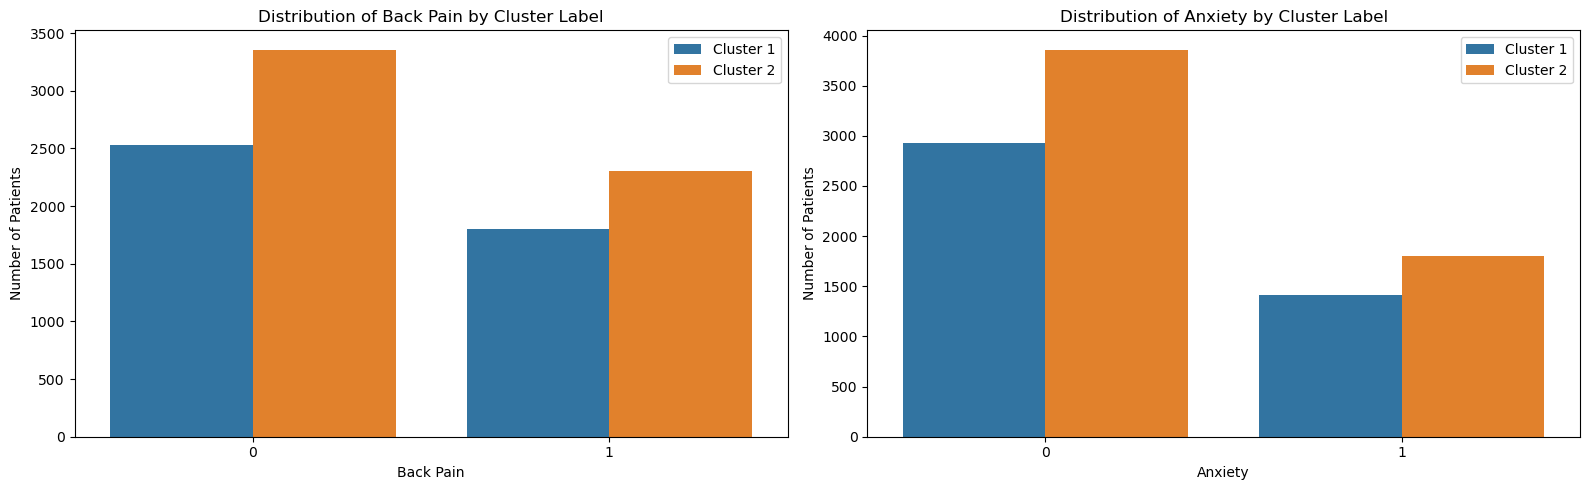


For Back Pain, respondents from Cluster 1 had 0.417, on average.
Respondents from Cluster 2 had 0.407, on average.

For Anxiety, respondents from Cluster 1 had 0.325, on average.
Respondents from Cluster 2 had 0.319, on average.


In [102]:
plt.figure(figsize = [16,5])

#LEFT plot: Distribution of Back Pain, by cluster label
plt.subplot(1, 2, 1)
plt.title('Distribution of Back Pain by Cluster Label')
sns.countplot(data = hca_df, x="BackPain", hue="ward_cluster_labels")
plt.legend(["Cluster 1", "Cluster 2"])
plt.xlabel("Back Pain")
plt.ylabel("Number of Patients");

#RIGHT plot: Distribution of Anxiety, by cluster label
plt.subplot(1, 2, 2)
plt.title("Distribution of Anxiety by Cluster Label")
sns.countplot(data = hca_df, x="Anxiety", hue="ward_cluster_labels")
plt.legend(["Cluster 1", "Cluster 2"])
plt.xlabel("Anxiety")
plt.ylabel("Number of Patients");

#Display the plot
plt.tight_layout()
plt.show();

BP_c1_mean = hca_df.loc[hca_df['ward_cluster_labels'] == 1, 'BackPain'].mean()
BP_c2_mean = hca_df.loc[hca_df['ward_cluster_labels'] == 2, 'BackPain'].mean()
print(f"\nFor Back Pain, respondents from Cluster 1 had {round(BP_c1_mean, 3)}, on average.")
print(f"Respondents from Cluster 2 had {round(BP_c2_mean, 3)}, on average.")
Ax_c1_mean = hca_df.loc[hca_df['ward_cluster_labels'] == 1, 'Anxiety'].mean()
Ax_c2_mean = hca_df.loc[hca_df['ward_cluster_labels'] == 2, 'Anxiety'].mean()
print(f"\nFor Anxiety, respondents from Cluster 1 had {round(Ax_c1_mean, 3)}, on average.")
print(f"Respondents from Cluster 2 had {round(Ax_c2_mean, 3)}, on average.")

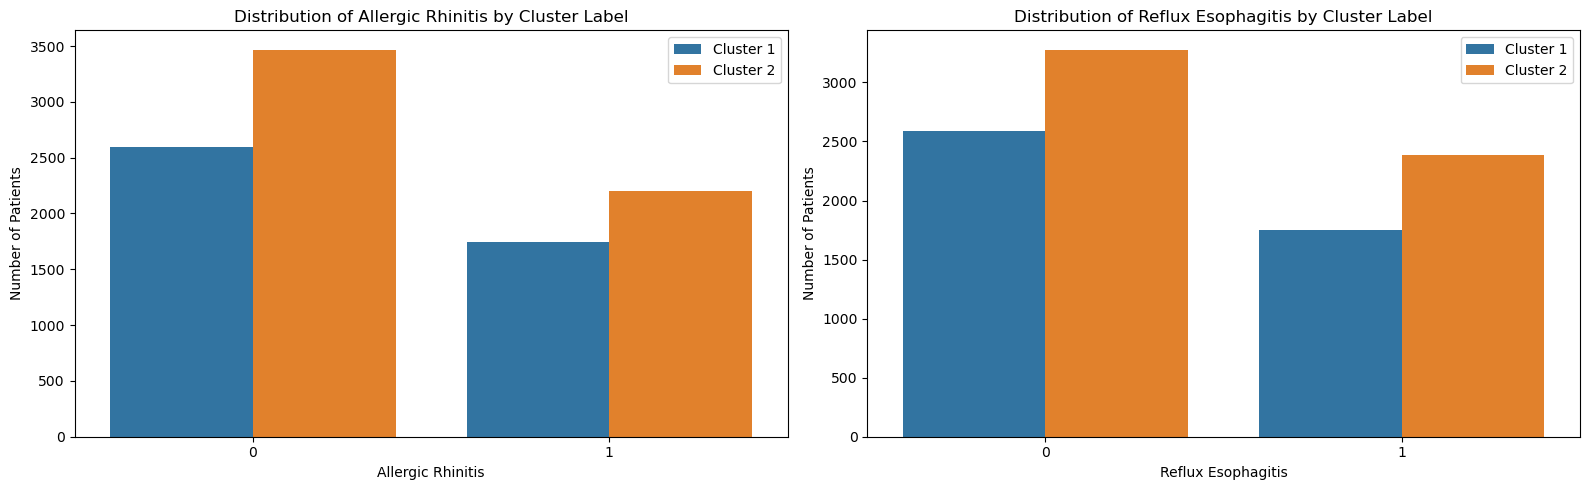


For Allergic Rhinitis, respondents from Cluster 1 had 0.402, on average.
Respondents from Cluster 2 had 0.388, on average.

For Reflux Esophagitis, respondents from Cluster 1 had 0.403, on average.
Respondents from Cluster 2 had 0.422, on average.


In [104]:
plt.figure(figsize = [16,5])

#LEFT plot: Distribution of Allergic Rhinitis, by cluster label
plt.subplot(1, 2, 1)
plt.title('Distribution of Allergic Rhinitis by Cluster Label')
sns.countplot(data = hca_df, x="Allergic_rhinitis", hue="ward_cluster_labels")
plt.legend(["Cluster 1", "Cluster 2"])
plt.xlabel("Allergic Rhinitis")
plt.ylabel("Number of Patients");

#RIGHT plot: Distribution of Reflux Esophagitis, by cluster label
plt.subplot(1, 2, 2)
plt.title("Distribution of Reflux Esophagitis by Cluster Label")
sns.countplot(data = hca_df, x="Reflux_esophagitis", hue="ward_cluster_labels")
plt.legend(["Cluster 1", "Cluster 2"])
plt.xlabel("Reflux Esophagitis")
plt.ylabel("Number of Patients");

#Display the plot
plt.tight_layout()
plt.show();

AR_c1_mean = hca_df.loc[hca_df['ward_cluster_labels'] == 1, 'Allergic_rhinitis'].mean()
AR_c2_mean = hca_df.loc[hca_df['ward_cluster_labels'] == 2, 'Allergic_rhinitis'].mean()
print(f"\nFor Allergic Rhinitis, respondents from Cluster 1 had {round(AR_c1_mean, 3)}, on average.")
print(f"Respondents from Cluster 2 had {round(AR_c2_mean, 3)}, on average.")
RE_c1_mean = hca_df.loc[hca_df['ward_cluster_labels'] == 1, 'Reflux_esophagitis'].mean()
RE_c2_mean = hca_df.loc[hca_df['ward_cluster_labels'] == 2, 'Reflux_esophagitis'].mean()
print(f"\nFor Reflux Esophagitis, respondents from Cluster 1 had {round(RE_c1_mean, 3)}, on average.")
print(f"Respondents from Cluster 2 had {round(RE_c2_mean, 3)}, on average.")

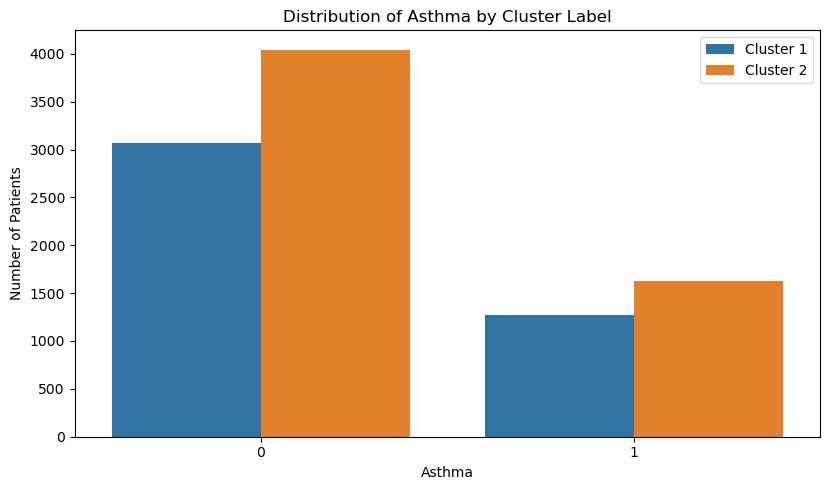


For Asthma, respondents from Cluster 1 had 0.293, on average.
Respondents from Cluster 2 had 0.286, on average.


In [106]:
plt.figure(figsize = [16,5])

#Distribution of Asthma by cluster label
plt.subplot(1, 2, 1)
plt.title('Distribution of Asthma by Cluster Label')
sns.countplot(data = hca_df, x="Asthma", hue="ward_cluster_labels")
plt.legend(["Cluster 1", "Cluster 2"])
plt.xlabel("Asthma")
plt.ylabel("Number of Patients");

#Display the plot
plt.tight_layout()
plt.show();

As_c1_mean = hca_df.loc[hca_df['ward_cluster_labels'] == 1, 'Asthma'].mean()
As_c2_mean = hca_df.loc[hca_df['ward_cluster_labels'] == 2, 'Asthma'].mean()
print(f"\nFor Asthma, respondents from Cluster 1 had {round(As_c1_mean, 3)}, on average.")
print(f"Respondents from Cluster 2 had {round(As_c2_mean, 3)}, on average.")

In [108]:
summary_dict = {'cluster_1' : [child_c1_mean, age_c1_mean, ReAdmis_c1_mean, docv_c1_mean, vitdsupp_c1_mean, sdr_c1_mean, HB_c1_mean, Str_c1_mean, 
                               ow_c1_mean, Arth_c1_mean, Diab_c1_mean, HyLp_c1_mean, BP_c1_mean, Ax_c1_mean, AR_c1_mean, RE_c1_mean, As_c1_mean], 
                'cluster_2' : [child_c2_mean, age_c2_mean, ReAdmis_c2_mean, docv_c2_mean, vitdsupp_c2_mean, sdr_c2_mean, HB_c2_mean, Str_c2_mean, 
                               ow_c2_mean, Arth_c2_mean, Diab_c2_mean, HyLp_c2_mean, BP_c2_mean, Ax_c2_mean, AR_c2_mean, RE_c2_mean, As_c2_mean]}
summary_df = pd.DataFrame(data = summary_dict, index=['Number of Children', 'Age', 'Readmission', 'Doctor Visits', 'Vitamin D Supplements', 
                                                      'Soft Drink Consumption', 'High Blood Pressure', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 
                                                      'Hyperlipidemia', 'Back Pain', 'Anxiety', 'Allergic Rhinitis', 'Reflux Esophagitis', 'Asthma'])
print("A summary of the means for each patient characteristic, by participant cluster:")
summary_df

A summary of the means for each patient characteristic, by participant cluster:


,cluster_1,cluster_2
Number of Children,2.192388,2.024360
Age,73.740484,38.032127
Readmission,0.373241,0.362048
Doctor Visits,5.031603,4.997352
Vitamin D Supplements,0.396309,0.400883
Soft Drink Consumption,0.257670,0.257370
High Blood Pressure,0.415456,0.404060
Stroke,0.203460,0.196117
Overweight,0.706574,0.711562
Arthritis,0.360554,0.354987


In [ ]:
plt.figure(figsize = [16,5])
sns.lineplot(data = summary_df, markers=True)
plt.title("Distribution of Averages of Patient Characteristics, by Participant Cluster")
plt.xlabel("Patient Characteristic")
plt.ylabel("Mean Score");

In [ ]:
#Define and X and y
X = hca_df[["Children", "Age", "ReAdmis", "Doc_visits", "vitD_supp", "Soft_drink", "HighBlood", "Stroke", 
        "Overweight", "Arthritis", "Diabetes", "Hyperlipidemia", "BackPain", "Anxiety", "Allergic_rhinitis", 
        "Reflux_esophagitis", "Asthma"]]
y = hca_df['ward_cluster_labels']

#Generate a silhouette score
model_score = silhouette_score(X, y, metric='euclidean')
print(f"The silhouette score of this hierarchical clustering is: {round(model_score, 3)}")